# Neural Network Training 🧠🏋🏻

In [1]:
import pickle
import pandas as pd
import numpy as np
import pydot as pyd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import LSTM
from keras import models
from keras.layers.normalization import BatchNormalization
from keras.models import model_from_json
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import json

----

## Regular DataFrame

In [27]:
train = pd.read_pickle('../output/fam_df.csv')
train

,F.Transform,Tag
0,"[214.0, 1468.2663139035296, 1354.9901292253478...",1
1,"[2884.0, 28338.15576414532, 62698.33809773314,...",1
2,"[231582.0, 274082.53149146156, 349585.41389145...",1
3,"[79700.0, 102571.46322235715, 153200.915277075...",1
4,"[63870.0, 52903.555252298946, 141644.395098856...",1
...,...,...
1443,"[583.0, 15302.869133939248, 8141.018024000418,...",4
1444,"[7528.0, 36567.48880158042, 32709.202174082795...",4
1445,"[57975.0, 49892.81312863944, 28033.09150727976...",4
1446,"[11773.0, 12848.633686627703, 17174.7713207563...",4


In [3]:
buf_train = pd.read_pickle('../output/fam_df_buf.csv')
buf_train.head()

,F.Transform,Tag
0,"[214.0, 1468.2663139035296, 1354.9901292253478...",1
1,"[2884.0, 28338.15576414532, 62698.33809773314,...",1
2,"[231582.0, 274082.53149146156, 349585.41389145...",1
3,"[79700.0, 102571.46322235715, 153200.915277075...",1
4,"[63870.0, 52903.555252298946, 141644.395098856...",1


In [4]:
hyp_train = pd.read_pickle('../output/fam_df_hyp.csv')
hyp_train.head()

,F.Transform,Tag
0,"[293595.0, 304988.4303126547, 362397.898872967...",3
1,"[86658.0, 129724.50928813031, 162017.609968094...",3
2,"[1281.0, 4419.925618996195, 17939.362311554847...",3
3,"[96639.0, 22316.930795543907, 32249.5689638383...",3
4,"[179760.0, 229731.08867416185, 199311.15093873...",3


In [5]:
den_train = pd.read_pickle('../output/fam_df_den.csv')
den_train.head()

,F.Transform,Tag
0,"[759.0, 1264.0386787128, 5573.958052489257, 94...",2
1,"[2020.0, 1656.1083125729801, 3156.932228684829...",2
2,"[1351.0, 5449.936291919177, 4966.821802789967,...",2
3,"[2070.0, 4841.070824996716, 5126.3104211967475...",2
4,"[3425.0, 2449.0917918794817, 4642.320822691707...",2


In [6]:
lep_train = pd.read_pickle('../output/fam_df_lep.csv')
lep_train.head()

,F.Transform,Tag
0,"[1861.0, 3653.0797257971158, 7204.222659266171...",4
1,"[5002.0, 6074.840944470398, 6964.757194668609,...",4
2,"[2936.0, 3189.784904610516, 24216.056958852336...",4
3,"[9395.0, 6637.3150408545935, 15817.38378119733...",4
4,"[8540.0, 8681.16546732637, 34449.579880177, 24...",4


In [7]:
X = np.concatenate((np.vstack(buf_train["F.Transform"]), np.vstack(den_train["F.Transform"]), np.vstack(hyp_train["F.Transform"]), np.vstack(lep_train["F.Transform"])))
y = np.concatenate((buf_train.Tag, den_train.Tag, hyp_train.Tag, lep_train.Tag))

In [8]:
y = y.reshape(-1, 1)

In [9]:
enc = preprocessing.OneHotEncoder()
y = enc.fit_transform(y)

In [10]:
y = y.toarray()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Dummies DataFrame

In [ ]:
#train_dum = pd.read_csv('../output/fam_dum_df.csv', index_col=0)
#train_dum.head()

## Capped DataFrame

In [ ]:
#train_cap = pd.read_csv('../output/fam_cap_df.csv', index_col=0)
#train_cap.head()

In [ ]:
#X = train.drop(columns=["Tag"])
#y = train["Tag"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

---

---

# Neural Network Architecture 

In [19]:
number_classes = y.shape[1]
inshape = (X_train.shape[1],)


model = models.Sequential()  #creates the neural network layers:

model.add(layers.Dense(512, activation='relu', input_shape=inshape))
model.add(layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(number_classes, activation='softmax'))
model.compile(optimizer='Nadam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(X_train,
        y_train,
        epochs=50,
        batch_size=20,
        validation_data=(X_test, y_test))

results = model.evaluate(X_test, y_test)
print("\n")
print("Resultados: ",results)
print("\n")

Epoch 1/50
58/58 [==============================] - 3s 48ms/step - loss: 0.9099 - accuracy: 0.6313 - val_loss: 0.7600 - val_accuracy: 0.7655
Epoch 2/50
58/58 [==============================] - 3s 48ms/step - loss: 0.6867 - accuracy: 0.7168 - val_loss: 0.7101 - val_accuracy: 0.7690
Epoch 3/50
58/58 [==============================] - 3s 48ms/step - loss: 0.5423 - accuracy: 0.7824 - val_loss: 0.7838 - val_accuracy: 0.7345
Epoch 4/50
58/58 [==============================] - 3s 48ms/step - loss: 0.4804 - accuracy: 0.7979 - val_loss: 0.7608 - val_accuracy: 0.6690
Epoch 5/50
58/58 [==============================] - 3s 48ms/step - loss: 0.4683 - accuracy: 0.8290 - val_loss: 0.7742 - val_accuracy: 0.7276
Epoch 6/50
58/58 [==============================] - 3s 53ms/step - loss: 0.4404 - accuracy: 0.8161 - val_loss: 0.7460 - val_accuracy: 0.7241
Epoch 7/50
58/58 [==============================] - 3s 48ms/step - loss: 0.4552 - accuracy: 0.8316 - val_loss: 0.7833 - val_accuracy: 0.6483
Epoch 8/50
58

In [14]:
name='0.9034-accuracy-20batch_size-50epochs-loss1.0390'
model_json = model.to_json()
with open(name+'.json', 'w') as json_file:
    json.dump(model_json, json_file)
model.save('../models/'+name+'.h5')

---

---

# Predictions

In [18]:
y_pred = model.predict(X_test)
y_pred

array([[9.9902940e-01, 8.1644372e-05, 1.5538946e-05, 8.7346212e-04],
       [9.3870368e-03, 5.5032738e-02, 8.8960277e-03, 9.2668426e-01],
       [1.0000000e+00, 8.5711652e-29, 6.2027412e-26, 8.3257126e-26],
       ...,
       [9.5565468e-02, 7.7951150e-03, 8.7746751e-04, 8.9576191e-01],
       [7.8613609e-02, 5.0996542e-01, 8.5923173e-02, 3.2549781e-01],
       [1.0000000e+00, 3.9577573e-18, 9.8978943e-19, 9.9496917e-17]],
      dtype=float32)

In [19]:
prediction = enc.inverse_transform(y_pred)
prediction = prediction.reshape(prediction.shape[0])
prediction

array([1, 4, 1, 1, 4, 4, 2, 4, 2, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 2,
       1, 1, 4, 4, 4, 2, 1, 1, 2, 2, 4, 1, 2, 1, 4, 4, 1, 1, 1, 4, 1, 4,
       1, 4, 4, 3, 4, 1, 4, 2, 4, 1, 2, 2, 4, 2, 1, 4, 4, 4, 4, 4, 4, 1,
       1, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 1, 1,
       4, 1, 1, 1, 1, 2, 2, 1, 1, 4, 1, 4, 2, 1, 1, 4, 4, 2, 1, 4, 4, 2,
       2, 4, 2, 2, 1, 4, 4, 1, 4, 4, 4, 1, 4, 4, 2, 4, 1, 4, 4, 3, 4, 4,
       1, 4, 1, 4, 4, 4, 4, 1, 4, 1, 1, 4, 3, 2, 4, 4, 1, 2, 4, 1, 4, 4,
       2, 4, 4, 1, 1, 4, 1, 1, 4, 4, 1, 2, 4, 2, 4, 4, 4, 4, 2, 1, 4, 4,
       2, 2, 4, 2, 2, 4, 4, 1, 4, 2, 4, 4, 2, 4, 1, 2, 2, 2, 2, 1, 4, 4,
       4, 1, 1, 3, 2, 4, 1, 4, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4,
       4, 2, 2, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 4, 2, 1, 2, 3, 2, 4, 4,
       1, 4, 1, 4, 2, 4, 1, 2, 1, 1, 2, 1, 4, 2, 2, 4, 2, 1, 4, 4, 4, 4,
       4, 1, 4, 1, 4, 4, 1, 1, 1, 1, 4, 4, 2, 1, 1, 1, 4, 1, 4, 1, 4, 4,
       4, 4, 2, 1])

In [20]:
y_test = enc.inverse_transform(y_test)
y_test = y_test.reshape(y_test.shape[0])
y_test

array([1, 4, 1, 1, 4, 4, 2, 4, 2, 1, 1, 3, 1, 4, 1, 4, 1, 1, 1, 1, 1, 2,
       1, 1, 3, 4, 4, 2, 1, 3, 2, 2, 4, 1, 2, 1, 3, 4, 3, 3, 1, 3, 1, 4,
       1, 2, 2, 3, 2, 1, 4, 2, 2, 1, 2, 2, 4, 1, 1, 4, 4, 1, 2, 3, 4, 1,
       3, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 3, 3, 3, 2, 3, 3, 3, 4, 4, 1, 1,
       3, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 4, 1, 2, 1, 3, 4, 2,
       2, 2, 2, 2, 1, 4, 4, 3, 4, 4, 2, 1, 4, 4, 4, 4, 3, 4, 2, 3, 2, 4,
       1, 4, 1, 2, 2, 2, 3, 1, 4, 3, 1, 2, 3, 2, 4, 4, 1, 2, 4, 1, 4, 2,
       2, 4, 2, 1, 1, 3, 1, 1, 4, 3, 1, 2, 3, 2, 4, 4, 3, 3, 2, 3, 3, 4,
       2, 2, 4, 2, 2, 3, 3, 1, 2, 2, 4, 2, 2, 3, 1, 3, 2, 3, 2, 3, 3, 3,
       4, 1, 1, 3, 2, 4, 3, 4, 3, 2, 4, 1, 3, 1, 1, 1, 4, 3, 1, 4, 2, 4,
       4, 2, 3, 2, 2, 3, 3, 1, 3, 1, 4, 3, 4, 4, 2, 4, 1, 2, 3, 1, 4, 2,
       3, 4, 1, 3, 3, 4, 1, 2, 1, 1, 2, 1, 4, 2, 2, 4, 2, 1, 3, 2, 4, 1,
       3, 1, 4, 1, 3, 4, 1, 2, 2, 1, 3, 4, 2, 1, 1, 1, 4, 1, 4, 1, 4, 4,
       4, 4, 4, 1])

In [21]:
prediction_df = pd.DataFrame({'prediction': prediction,
                              'ground_truth': y_test,
                              'diff': prediction - y_test})
prediction_df

,prediction,ground_truth,diff
0,1,1,0
1,4,4,0
2,1,1,0
3,1,1,0
4,4,4,0
...,...,...,...
285,4,4,0
286,4,4,0
287,4,4,0
288,2,4,-2


In [22]:
prediction_df["diff"].value_counts()

 0    203
 1     31
 2     25
-2     19
-1      9
 3      3
Name: diff, dtype: int64

In [23]:
x = 238/290 *100
x

82.06896551724138

---

---

## Drawing Layers' Schema and Summary

In [14]:
keras.utils.plot_model(model, "Seq-BN.png", show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2621952   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 260       
Total params: 2,795,716
Trainable params: 2,795,204
Non-trainable params: 512
____________________________________________

---

## Plotting Accuracy and Loss

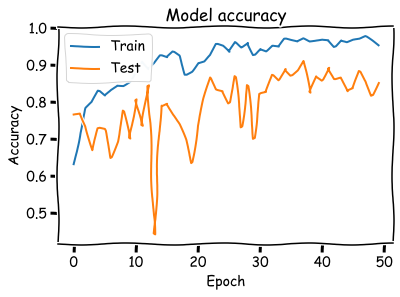

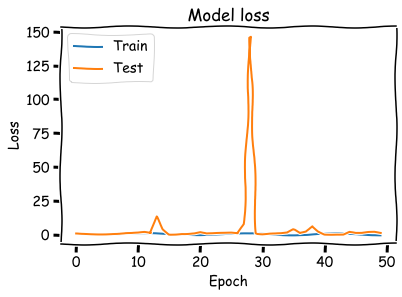

In [20]:
with plt.xkcd():
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


---

## Plotting Confusion Matrix

[0.18712631 0.1344949  0.25396717 0.4244116 ]
3


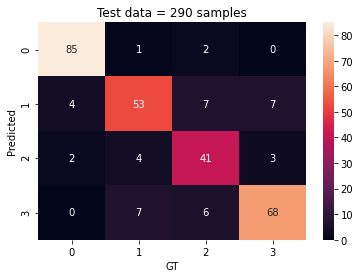

In [21]:
## Use argmax to project output probabilites as class index label
proba = model.predict(X_test)
print(proba[0])
y_predi = np.argmax(proba, axis=1)
print(y_predi[0])
y_t = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_t, y_predi)

sns.heatmap(cm, annot=True)
plt.xlabel("GT")
plt.ylabel("Predicted")
plt.title(f"Test data = {len(y_predi)} samples")
plt.show()

---

---

## ROC Curve

Best performance: Convolutional neural network with 2D convolutional layers and MaxPooling2D (validation accuracy = 0.95).

In [28]:
from sklearn.metrics import roc_auc_score

In [ ]:
# ROC Curve:
multiclassROCcurve(model, val_x, val_y, n_classes)

# Evaluating overfitting:
accuracyPlot(history, 4)
lossPlot(history, 4)
accuracyPlot(history, 10)
lossPlot(history, 10)

In [ ]:
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])

# Extract AUC score
roc_auc_score(y_true, y_scores)

# Extract ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y, y_scores, pos_label=1)

In [ ]:
%matplotlib inline
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

analyzeModels = {
    name:model for name, model in models.items() if name in ["logis","randomforest"]
}

plt.figure(figsize=(10,5))
aucs = []
for name, model in analyzeModels.items():
    y_scores = model.predict_proba(X_test)
    
    alive_scores = y_scores[:,1]
    
    # Extract AUC score
    auc = roc_auc_score(y_test, alive_scores)
    aucs.append(f"AUC({name})={round(auc,2)}")
    # Extract ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, alive_scores, pos_label=1)
    plt.plot(fpr,tpr)

plt.legend(aucs)

---

---

## Saving the Model

In [ ]:
name='0.9034-accuracy-20batch_size-50epochs-loss1.0390'
model_json = model.to_json()
with open(name+'.json', 'w') as json_file:
    json.dump(model_json, json_file)
model.save('../models/'+name+'.h5')